In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.io import loadmat


#get the dataset from github
!wget "https://github.com/valentinagliozzi/NNCourse/raw/main/fung.mat" -O "fung.mat"

--2025-01-12 15:46:57--  https://github.com/valentinagliozzi/NNCourse/raw/main/fung.mat
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/valentinagliozzi/NNCourse/main/fung.mat [following]
--2025-01-12 15:46:57--  https://raw.githubusercontent.com/valentinagliozzi/NNCourse/main/fung.mat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1031936 (1008K) [application/octet-stream]
Saving to: ‘fung.mat’

fung.mat            100%[===================>]   1008K  --.-KB/s    in 0.05s   

2025-01-12 15:46:58 (21.7 MB/s) - ‘fung.mat’ saved [1031936/1031936]



In [2]:
#Functions' definitions


def percett(X, T, n):
    """
    Perceptron implementation.
    Classifies a set of patterns into two classes.
    Inputs are real and outputs are bipolar, 1, -1.
    There are m inputs plus the bias input, always set to -1.
    There are m+1 weights connecting the inputs and the bias to the single output y.
    The m+1 weights form a vector W, initially containing random values.
    The activation function is the sign.
    The input is a matrix X with m columns (one column per input value),
    and t rows, where t is the number of patterns to learn.
    The patterns are m-dimensional.
    The input also includes the column vector T (target) with t rows,
    containing the values to learn (+1 or -1, identifying the two classes).
    n is the number of epochs set for learning.
    Usage: [a, b] = percett(X, T, n)
    a contains the history of weights and b the history of the number of learned patterns.
    """
    #assegna a t il numero di righe della matrice e a m il numero di colonne
    t, m = X.shape
    #inizializza randomicamente W assegnandogli valori compresi tra 0 e 1
    W = np.random.rand(m + 1)  # Random initialization of W.

    """
    hstack serve per concatenare orizzontalmente matrici e vettori
    -np.ones crea una colonna di bias composta da -1
    in generale viene aggiunta una colonna che rappresenta il bias alla matrice
    facendola diventare di dimensioni t X m+1
    """
    X = np.hstack((X, -np.ones((t, 1))))  # Add bias input
    #inizializza una matrice di dimensioni m+1 X n, utilizzata per memorizzare i pesi per le n iterazioni
    #le righe mostrano la storia del singolo preso, le colonne mostrano i pesi a ogni iterazione
    storiapesi = np.zeros((m + 1, n))
    #inizializza un vettore di dimensioni n, tutti i valori sono a 0
    storiappresi = np.zeros(n) # n epochs

    for i in range(n):
        #inserisce i pesi di w nella colonna i
        storiapesi[:, i] = W

        """
        np.dot(W, X.T) esegue il prodotto scalare tra il vettore W di dimensioni m+1 e la matrice X trasposta di dimensioni m+1 X t ottenendo un vettore di dimensioni t
        sign_perc restituisce 1 se il risultato è positivo e -1 se il risultato è negativo
        Y conterrà i valori di output per il set di pesi W all'epoca i
        """
        Y = sign_perc(np.dot(W, X.T))  # Y is a row vector containing the t outputs
        #viene salvato in storiappresi[i] il numero di pattern correttamente appresi nell'epoca i
        storiappresi[i] = np.sum(T == Y) # number of correctly learned patterns for that iteration

        for j in range(t):
            #si verifica che i risultati ottenuti siano come quelli desiderati
            #se il pattern è errato si modificano i pesi moltiplicando il risulatto atteso j per l'input alla riga j
            if Y[j] != T[j]:
                W = W + T[j] * X[j, :]

    return storiapesi, storiappresi

def sign_perc(x):
    return 2 * (x > 0) - 1

def usaperc(W, P):
    """
    Uses the perceptron after the patterns have been learned.
    Receives W and a matrix of patterns P.
    Returns a column of responses, one for each pattern.
    """
    t, m = P.shape  # t patterns, m dimensions


    # Add a column of -1 to P for the bias term
    P = np.hstack((P, -np.ones((t, 1))))

    display(P.shape)

    #W.shape[0] restituisce il numero di righe di W
    w = W.shape[0]
    display(W.shape)

    #se il numero di righe di W (w) e il numero di colonne di P con la colonna del bias aggiunta(m+1) per poter effettuare il prodotto scalare
    if w != m + 1:
        raise ValueError("Incorrect dimensions!")

    # Calculate the result
    #calcola il risultato come nel caso precedente ma con un vettore colonna invece di un vettore riga
    ris = sign_perc(np.dot(W, P.T)).T
    return ris


In [3]:
# Load the data
fung = sio.loadmat('fung.mat')['fun'].astype(np.float64)

# Training pairs
fun1i = fung[:4062, :127]

#mostrare le prima 5 colonne delle prime 10 righe
print(fun1i[:10,:5])

fun1t = 2 * fung[:4062, -1] - 1


# Test pairs
fun2i = fung[4063:, :127]
fun2t = 2 * fung[4063:, -1] - 1


[[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]]


In [5]:
# Set random seed
np.random.seed(1992)

# Learning
#u, v = percett(fun1i, fun1t, 50)

#cambio il numero di epoche
u, v = percett(fun1i, fun1t, 60)

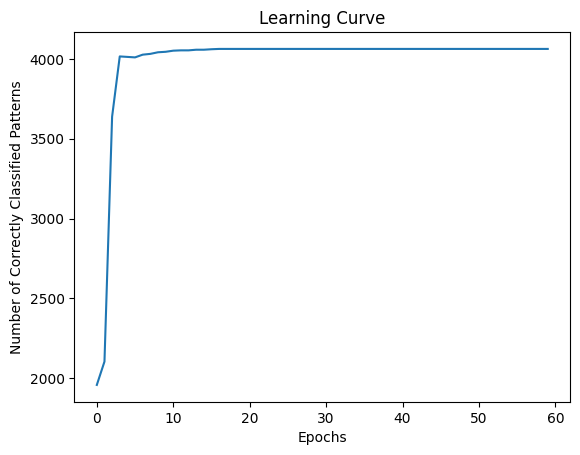

Percentage correctly learned during Training: 100.00%


In [6]:
# Plot the learning curve
plt.plot(v)
plt.title("Learning Curve")
plt.xlabel("Epochs")
plt.ylabel("Number of Correctly Classified Patterns")
plt.show()

print(f"Percentage correctly learned during Training: {(np.max(v) / 4062) * 100:.2f}%")

In [7]:
# Find the index of the first maximum
#hh è il valore maggiore di pattern appresi da un set, h corrisponde alla sua posizione
hh, h = np.max(v), np.argmax(v)

# Optimal weight column
W = u[:, h]

# Test
ris = usaperc(W, fun2i)
#valutazione della qualità del perceptron dopo l'addestramento, confrontando i valori ottenuti usando il test set e i risultati aspettati
z = np.sum(ris == fun2t)

print(f"At Test, correct results on UNSEEN fungi:{z}, i.e., {(z / 4061) * 100:.2f}%")

(4061, 128)

(128,)

At Test, correct results on UNSEEN fungi:4051, i.e., 99.75%
